### References
- https://github.com/baptiste-meunier/NowcastingML_3step/blob/main/11-Github/Main.R
- https://mrf-web.readthedocs.io/en/latest/index.html

### [About Fred-MD](https://fg-research.com/blog/general/posts/fred-md-overview.html)

### Target Variable:
- CPIAUCSL: CPI, all items
### Predictors:
- RPI: real personal income
- UNRATE: civilian unemployment rate
- UMCSENTX: consumer sentiment index
- BOGMBASE: monetary base
- BUSLOANS: commercial and industrial loans
- GS1: 1-year treasury rate
- FEDFUNDS: federal funds rate
- S&P 500: S&Ps common stock price index, composite

In [41]:
# Data Dependencies
import pandas as pd
import numpy as np
import os

In [42]:
def transform_series(series: pd.Series, trans_code: int):
    '''
    Transforms the time series based on the transformation code from FRED-MD.

    Parameters
    ----------
    series : pd.Series
        The time series to be transformed.
    trans_code : int
        The transformation code from FRED-MD.
    '''

    if trans_code == 1: # No transformation
        return series
    elif trans_code == 2: # First difference
        return series.diff()
    elif trans_code == 3: # Second difference
        return series.diff().diff()
    elif trans_code == 4: # Natural log
        return np.log(series)
    elif trans_code == 5: # First difference of natural log
        return np.log(series).diff()
    elif trans_code == 6: # Second difference of natural log
        return np.log(series).diff().diff()
    elif trans_code == 7: # Percent change
        return series.pct_change()
    else:
        raise ValueError(f"unknown transformation code {trans_code}")


In [43]:
### Transform Data ###

def get_data():
    '''
    Read in the data from the FRED-MD dataset and transform it based on the transformation codes.
    '''

    # get the time series
    file_path = os.path.join(os.getcwd(), "current.csv")
    data = pd.read_csv(file_path, skiprows=[1], index_col=0)
    data = data.dropna(how="all", axis=1)

    # make the column names uppercase
    data.columns = [c.upper() for c in data.columns]

    # process the dates
    data.index = pd.to_datetime(data.index, format="%m/%d/%Y")

    # get the transformation codes
    tcodes = pd.read_csv(file_path, nrows=1, index_col=0)
    tcodes.columns = [c.upper() for c in tcodes.columns]

    # transform the time series
    data = data.apply(lambda x: transform_series(x, tcodes[x.name].item()))
    data = data.dropna(how="all", axis=0)

    return data

# Get data
data = get_data()
data

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLX,RETAILX,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTX,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSX
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-02-01,0.003877,0.003621,0.010349,0.007336,0.007310,0.019395,0.013405,0.008628,0.007309,0.005232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014300,0.006036,0.004896,0.000000,0.019397,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021080,0.014339,0.014545,0.015652,0.006379,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014954,0.008267,0.009580,0.004766,0.020152,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,0.000950,0.000968,0.000711,0.000375,-0.001144,0.004810,0.004447,0.006822,0.008385,0.046971,...,-0.002222,-0.000061,-0.002576,-0.000291,-0.005741,1.5,-0.001974,-0.000766,0.001445,19.6750
2024-09-01,0.001844,0.000710,0.005257,0.007155,0.008903,-0.004052,-0.005958,-0.009125,-0.002372,-0.001699,...,-0.002598,0.000553,0.003820,0.002215,0.004635,2.2,-0.002368,-0.001586,-0.001641,17.6597
2024-10-01,0.004212,0.003923,0.002118,-0.001248,0.005575,-0.004998,-0.008395,-0.011421,-0.006463,-0.029031,...,0.002316,0.000734,-0.002249,0.000801,-0.003926,0.4,-0.001180,0.001920,-0.000463,19.9478


In [44]:
# Remove data before 2000
data = data.loc[data.index >= "2000-01-01"]
data

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLX,RETAILX,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTX,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSX
sasdate,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.008941,0.009676,-0.002427,0.007931,-0.006763,-0.000757,-0.003064,-0.004692,-0.013284,0.017689,...,-0.004285,0.001534,0.000655,-0.001185,0.000696,6.6,-0.002275,-0.001276,-0.010110,24.8430
2000-02-01,0.004112,0.004549,0.009366,-0.018158,0.014724,0.003443,0.004973,0.006192,0.007599,-0.003468,...,0.005015,-0.000585,-0.000680,0.002320,-0.002843,-0.7,0.006184,-0.003170,-0.007322,25.4560
2000-03-01,0.002778,0.003250,0.004906,0.011754,0.011593,0.003901,0.002226,0.001149,-0.003651,-0.003152,...,0.005486,-0.001198,-0.000673,-0.000606,0.000704,-4.2,-0.029803,-0.001179,0.016590,24.7678
2000-04-01,0.005362,0.004850,-0.000292,0.008276,-0.015180,0.006310,0.008122,0.008232,0.008414,0.013057,...,-0.016761,-0.001331,0.001973,0.001705,0.002106,2.1,-0.000135,0.008686,-0.005609,29.8331
2000-05-01,0.003587,0.000799,0.003749,-0.005321,0.001283,0.002897,0.001518,0.003286,0.001810,-0.003779,...,0.002287,0.001466,-0.004625,-0.006921,-0.004928,1.5,0.024727,-0.000153,-0.001897,29.4290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,0.000950,0.000968,0.000711,0.000375,-0.001144,0.004810,0.004447,0.006822,0.008385,0.046971,...,-0.002222,-0.000061,-0.002576,-0.000291,-0.005741,1.5,-0.001974,-0.000766,0.001445,19.6750
2024-09-01,0.001844,0.000710,0.005257,0.007155,0.008903,-0.004052,-0.005958,-0.009125,-0.002372,-0.001699,...,-0.002598,0.000553,0.003820,0.002215,0.004635,2.2,-0.002368,-0.001586,-0.001641,17.6597
2024-10-01,0.004212,0.003923,0.002118,-0.001248,0.005575,-0.004998,-0.008395,-0.011421,-0.006463,-0.029031,...,0.002316,0.000734,-0.002249,0.000801,-0.003926,0.4,-0.001180,0.001920,-0.000463,19.9478


In [45]:
### Summary Stats ###
vars = ["CPIAUCSL", "RPI", "UNRATE", "UMCSENTX", "BOGMBASE", "BUSLOANS", "GS1", "FEDFUNDS", "S&P 500"]
for col in vars:
    print(f"{col}: {data[col].mean():.2f} (mean), {data[col].std():.2f} (std), {data[col].min():.2f} (min), {data[col].max():.2f} (max)")

CPIAUCSL: 0.00 (mean), 0.00 (std), -0.01 (min), 0.01 (max)
RPI: 0.00 (mean), 0.02 (std), -0.14 (min), 0.18 (max)
UNRATE: 0.00 (mean), 0.66 (std), -2.20 (min), 10.40 (max)
UMCSENTX: -0.10 (mean), 4.32 (std), -17.30 (min), 11.20 (max)
BOGMBASE: -0.00 (mean), 0.03 (std), -0.16 (min), 0.15 (max)
BUSLOANS: -0.00 (mean), 0.01 (std), -0.09 (min), 0.09 (max)
GS1: -0.01 (mean), 0.19 (std), -1.08 (min), 0.61 (max)
FEDFUNDS: -0.00 (mean), 0.19 (std), -0.96 (min), 0.70 (max)
S&P 500: 0.00 (mean), 0.04 (std), -0.23 (min), 0.11 (max)


### Machine Learning
- [Macroeconomic Random Forest](https://mrf-web.readthedocs.io/en/latest/index.html)

In [46]:

# ML Dependencies
from MacroRandomForest import MRF
import matplotlib.pyplot as plt

In [47]:
# Remove uneeded vars
vars = ["CPIAUCSL", "RPI", "UNRATE", "UMCSENTX", "BOGMBASE", "BUSLOANS", "GS1", "FEDFUNDS", "S&P 500"]
train = data.copy()[vars]
train

,CPIAUCSL,RPI,UNRATE,UMCSENTX,BOGMBASE,BUSLOANS,GS1,FEDFUNDS,S&P 500
sasdate,,,,,,,,,
2000-01-01,0.000585,0.008941,0.0,6.6,-0.067162,0.002018,0.28,0.15,-0.002165
2000-02-01,0.001168,0.004112,0.1,-0.7,-0.023060,0.009817,0.10,0.28,-0.026095
2000-03-01,0.001739,0.002778,-0.1,-4.2,0.038959,-0.003048,0.00,0.12,0.037686
2000-04-01,-0.006450,0.005362,-0.2,2.1,0.004154,-0.001505,-0.07,0.17,0.013191
2000-05-01,0.002339,0.003587,0.2,1.5,0.000855,0.007966,0.18,0.25,-0.029782
...,...,...,...,...,...,...,...,...,...
2024-08-01,0.000322,0.000950,0.0,1.5,0.016598,0.003878,-0.47,0.00,-0.010855
2024-09-01,-0.000073,0.001844,-0.1,2.2,-0.017428,0.002219,-0.40,-0.20,0.025777
2024-10-01,0.000641,0.004212,0.0,0.4,0.010731,-0.000407,0.17,-0.30,0.029977


In [48]:
# Check for NaN
for idx, col in enumerate(train.columns):
    print(f"{idx}, {col}: {train[col].isnull().sum()}")
print(len(train))
print(f"mrf_data.shape {train.shape}")
# train

0, CPIAUCSL: 0
1, RPI: 0
2, UNRATE: 0
3, UMCSENTX: 0
4, BOGMBASE: 0
5, BUSLOANS: 0
6, GS1: 0
7, FEDFUNDS: 0
8, S&P 500: 0
300
mrf_data.shape (300, 9)


In [49]:
# Dependent variable
y_var = "CPIAUCSL"
y_pos = train.columns.get_loc(y_var)

# Exogenous variables
s_vars = ["UNRATE", "FEDFUNDS", "RPI", "UMCSENTX", "BOGMBASE", "BUSLOANS", "GS1", "S&P 500"]
S_pos = np.array([train.columns.get_loc(v) for v in s_vars])

# Independent variables
x_vars = ["UNRATE", "FEDFUNDS"]
x_pos = np.array([train.columns.get_loc(v) for v in x_vars])

In [50]:
# Predict last 12 observations (1 year) (out of sample position)
data_len = len(train)
num_oos = 12
oos_pos = np.arange(data_len - num_oos, data_len)
# copy test data
test = train[[y_var]].copy().iloc[oos_pos]
train

,CPIAUCSL,RPI,UNRATE,UMCSENTX,BOGMBASE,BUSLOANS,GS1,FEDFUNDS,S&P 500
sasdate,,,,,,,,,
2000-01-01,0.000585,0.008941,0.0,6.6,-0.067162,0.002018,0.28,0.15,-0.002165
2000-02-01,0.001168,0.004112,0.1,-0.7,-0.023060,0.009817,0.10,0.28,-0.026095
2000-03-01,0.001739,0.002778,-0.1,-4.2,0.038959,-0.003048,0.00,0.12,0.037686
2000-04-01,-0.006450,0.005362,-0.2,2.1,0.004154,-0.001505,-0.07,0.17,0.013191
2000-05-01,0.002339,0.003587,0.2,1.5,0.000855,0.007966,0.18,0.25,-0.029782
...,...,...,...,...,...,...,...,...,...
2024-08-01,0.000322,0.000950,0.0,1.5,0.016598,0.003878,-0.47,0.00,-0.010855
2024-09-01,-0.000073,0.001844,-0.1,2.2,-0.017428,0.002219,-0.40,-0.20,0.025777
2024-10-01,0.000641,0.004212,0.0,0.4,0.010731,-0.000407,0.17,-0.30,0.029977


In [51]:
# Build model
model = MRF.MacroRandomForest(
    data = train,
    x_pos = x_pos,
    oos_pos = oos_pos,
    S_pos = S_pos,
    y_pos = y_pos,
)

In [52]:
# Run the model
model_output = model._ensemble_loop()

Tree 1 out of 50
Tree 2 out of 50
Tree 3 out of 50
Tree 4 out of 50
Tree 5 out of 50
Tree 6 out of 50
Tree 7 out of 50
Tree 8 out of 50
Tree 9 out of 50
Tree 10 out of 50
Tree 11 out of 50
Tree 12 out of 50


Tree 13 out of 50
Tree 14 out of 50
Tree 15 out of 50
Tree 16 out of 50
Tree 17 out of 50
Tree 18 out of 50
Tree 19 out of 50
Tree 20 out of 50
Tree 21 out of 50
Tree 22 out of 50
Tree 23 out of 50
Tree 24 out of 50
Tree 25 out of 50
Tree 26 out of 50
Tree 27 out of 50
Tree 28 out of 50
Tree 29 out of 50
Tree 30 out of 50
Tree 31 out of 50
Tree 32 out of 50
Tree 33 out of 50
Tree 34 out of 50
Tree 35 out of 50
Tree 36 out of 50
Tree 37 out of 50
Tree 38 out of 50
Tree 39 out of 50
Tree 40 out of 50
Tree 41 out of 50
Tree 42 out of 50
Tree 43 out of 50
Tree 44 out of 50
Tree 45 out of 50
Tree 46 out of 50
Tree 47 out of 50
Tree 48 out of 50
Tree 49 out of 50
Tree 50 out of 50


In [53]:
output = model_output
forecasts = output['pred']
betas = output['betas']

In [56]:
# Map forecasts to date using data index
forecasts.dropna(inplace=True)
forecasts.index = train.index[oos_pos]
forecasts

,Ensembled_Prediction
sasdate,
2024-01-01,-0.000042
2024-02-01,0.000048
2024-03-01,0.000216
2024-04-01,0.000030
2024-05-01,0.000196
2024-06-01,0.000088
2024-07-01,0.000217
2024-08-01,0.000279
2024-09-01,0.000438


Text(0.5, 1.0, 'OOS predictions of MRF')

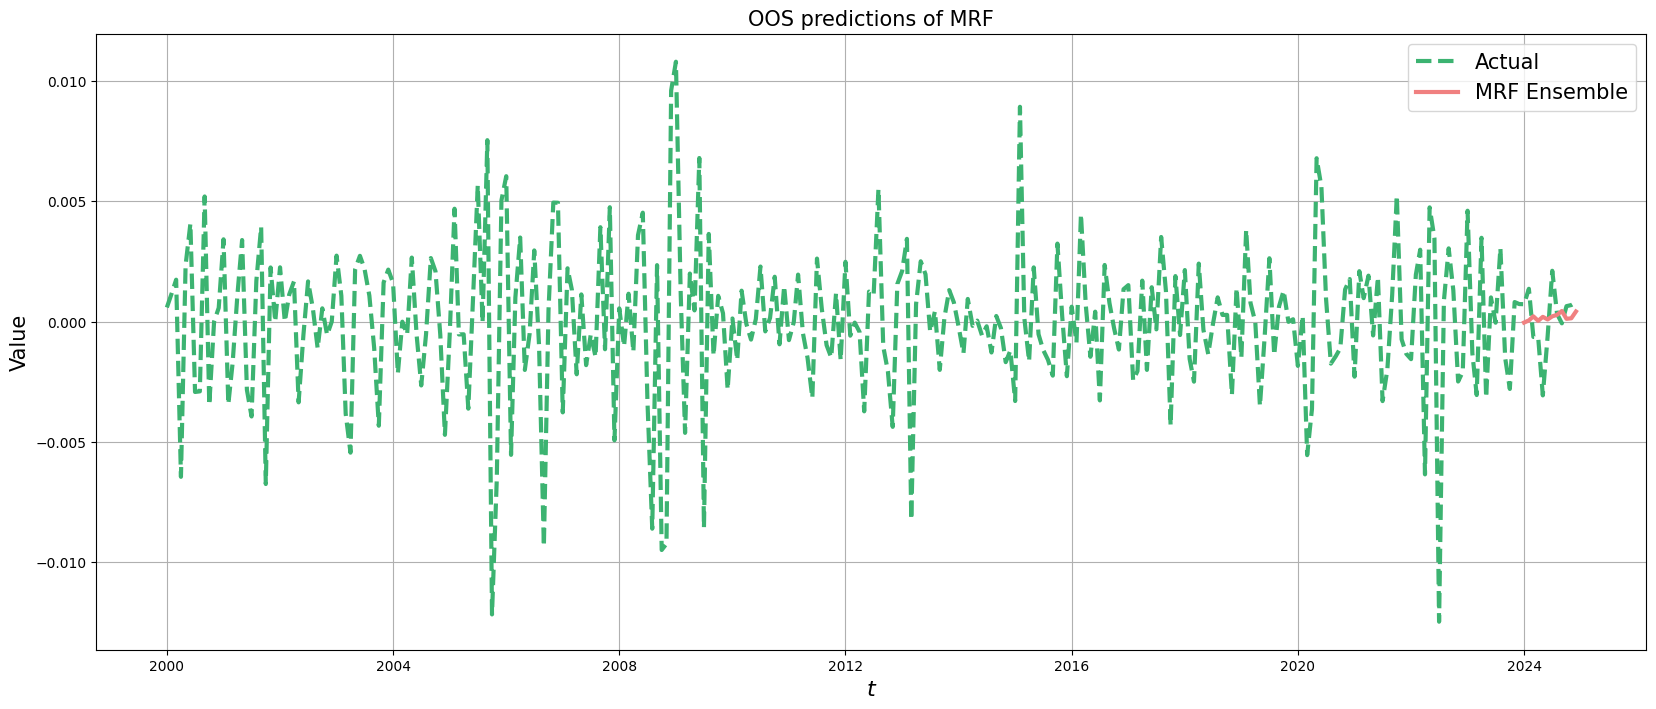

In [57]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)

# Plotting actual versus original
ax.plot(data[[y_var]], label = 'Actual', linewidth = 3, color ='mediumseagreen', linestyle = '--')
ax.plot(forecasts, color = 'lightcoral', linewidth = 3, label = "MRF Ensemble")

ax.legend(fontsize = 15)
ax.set_ylabel("Value", fontsize = 15)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("OOS predictions of MRF", fontsize = 15)